### Методы определения правильного числа кластеров

## Выпускная квалификационная работа

# Юхатсков Сергей

## Реальные наборы данных

Рассмотрим используемые в экспериментах наборы данных

Подключаем диск с наборами данных для тестов.

Наборы для удобства были заранее загружены с репозитория http://archive.ics.uci.edu/ml.

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/ВКР/Datasets'

Mounted at /content/drive/
/content/drive/MyDrive/ВКР/Datasets


###E.coli

In [ ]:
import pandas as pd

ecoli_df = pd.read_csv("ecoli.data", header=None, sep='\s+', 
                 names=['Name', 'mcg', 'gvh', 'lip', 'chg', 
                        'aac', 'alm1', 'alm2', 'Class'])
ecoli_df.head()


,Name,mcg,gvh,lip,chg,aac,alm1,alm2,Class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [ ]:
ecoli = ecoli_df.iloc[:, 1:ecoli_df.shape[1] - 1]
ecoli.head()

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35


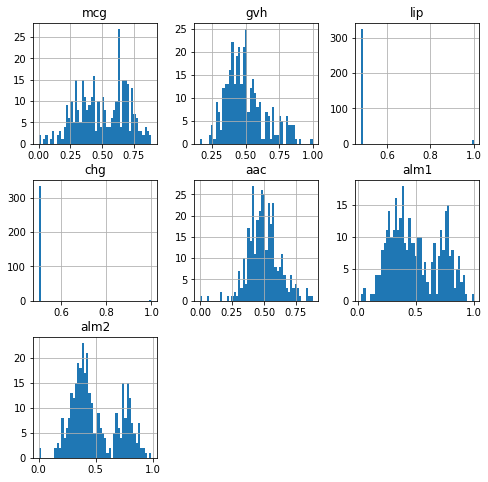

In [ ]:
import matplotlib.pyplot as plt
ecoli.hist(bins=50, figsize=(8,8))
plt.show()

In [ ]:
import numpy as np
print("lip - unique values and counts:", 
      np.unique(ecoli_df['lip'], return_counts=True))

print("chg - unique values and counts:", 
      np.unique(ecoli_df['chg'], return_counts=True))

lip - unique values and counts: (array([0.48, 1.  ]), array([326,  10]))
chg - unique values and counts: (array([0.5, 1. ]), array([335,   1]))


Значение **1** у lip и у chp повторяется слишком мало раз. Можно удалить этот признак.

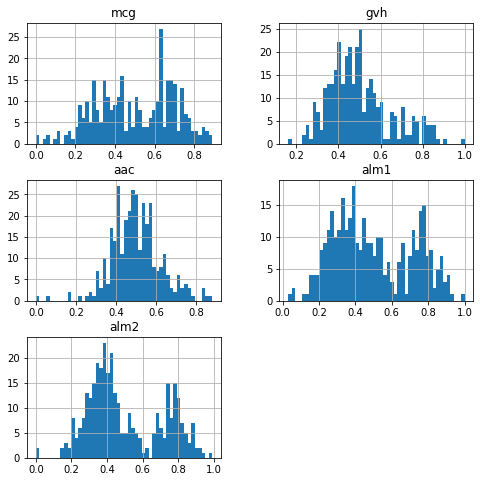

In [ ]:
from sklearn.preprocessing import LabelEncoder

del ecoli_df['lip']
del ecoli_df['chg']

encoder = LabelEncoder()
ecoli_df['Class'] = encoder.fit_transform(ecoli_df['Class'])

ecoli = ecoli_df.iloc[:, 1:ecoli_df.shape[1] - 1]

ecoli.hist(bins=50, figsize=(8,8))
plt.show()

In [ ]:
ecoli_y = ecoli_df['Class']
np.unique(ecoli_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([143,  77,   2,   2,  35,  20,   5,  52]))

###Glass

In [ ]:
import pandas as pd
glass_df = pd.read_csv("glass.data", header=None, 
                 names=['Id','refractive index', 'Sodium', 
                        'Magnesium', 'Aluminum', 'Silicon', 
                        'Potassium', 'Calcium', 'Barium', 'Iron', 'Class'])

glass_df.head()

,Id,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass = glass_df.iloc[:, 1:glass_df.shape[1] - 1]
glass.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


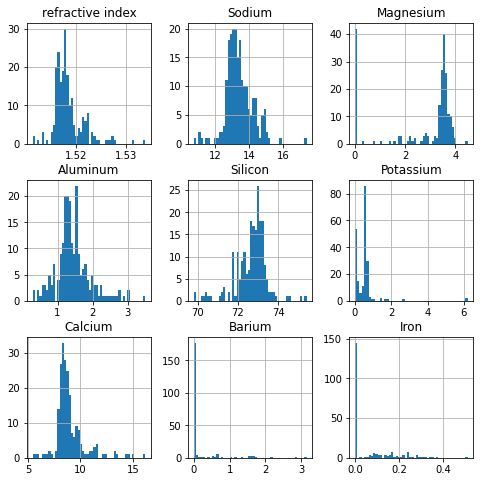

In [ ]:
import matplotlib.pyplot as plt
glass.hist(bins=50, figsize=(8,8))
plt.show()

In [ ]:
glass.shape

(214, 9)

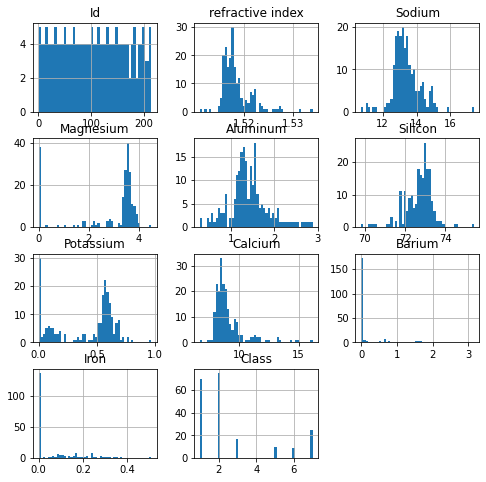

In [ ]:
# glass_df.iloc[:, 1:glass_df.shape[1] - 1]
new_glass_df = glass_df[glass_df['Potassium'] < 1]
new_glass_df.hist(bins=50, figsize=(8,8))
plt.show()

In [ ]:
new_glass_df.shape

(206, 11)

In [ ]:
print("Barium - unique values and counts:", 
      np.unique(new_glass_df['Barium'], return_counts=True))

print("Iron - unique values and counts:", 
      np.unique(new_glass_df['Iron'], return_counts=True))

Barium - unique values and counts: (array([0.  , 0.06, 0.09, 0.11, 0.14, 0.15, 0.24, 0.27, 0.4 , 0.53, 0.54,
       0.56, 0.61, 0.63, 0.64, 0.66, 0.67, 0.69, 0.76, 0.81, 1.06, 1.38,
       1.55, 1.57, 1.59, 1.64, 1.67, 1.68, 1.71, 3.15]), array([172,   1,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   2,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   1,
         1,   1,   1,   1]))
Iron - unique values and counts: (array([0.  , 0.01, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12,
       0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.24, 0.25,
       0.26, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.34, 0.35, 0.37, 0.51]), array([136,   1,   1,   1,   1,   3,   2,   6,   5,   4,   3,   3,   2,
         3,   7,   1,   2,   1,   1,   3,   7,   1,   1,   3,   1,   1,
         1,   1,   1,   1,   1,   1]))


У **83%** Barium равен 172. Можно удалить этот параметр.

In [ ]:
del new_glass_df['Barium']

In [ ]:
glass = new_glass_df.iloc[:, 1:glass_df.shape[1] - 1]
glass.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1


In [ ]:
glass_y = new_glass_df['Class']
np.unique(glass_y, return_counts=True)

(array([1, 2, 3, 5, 6, 7]), array([70, 75, 17, 10,  9, 25]))

###Iris

In [ ]:
import pandas as pd

iris_df = pd.read_csv("iris.data", header=None, 
                 names=['sepal length','sepal width', 'petal length', 'petal width', 'Class'])
iris_df.head()

,sepal length,sepal width,petal length,petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris = iris_df.iloc[:, 0:iris_df.shape[1] - 1]
iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


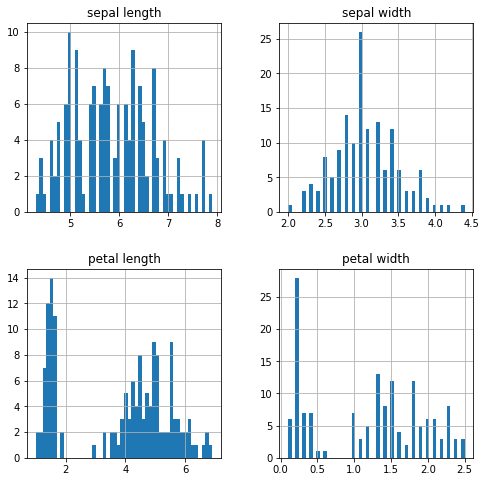

In [ ]:
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(8,8))
plt.show()

In [ ]:
iris.shape

(150, 4)

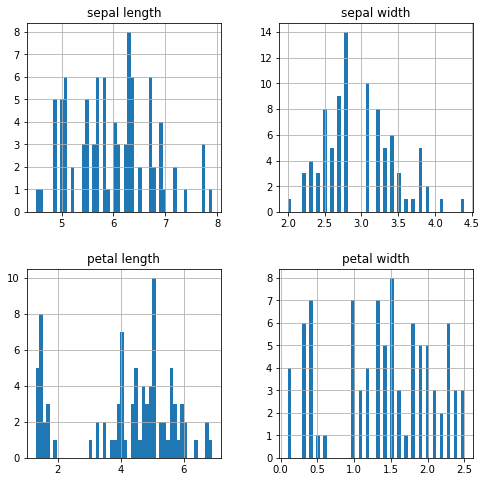

In [ ]:
new_iris_df = iris_df[(iris_df['sepal width'] >= 3.1) | (iris_df['sepal width'] <= 2.8)]
new_iris_df = new_iris_df[(new_iris_df['petal width'] > 0.2) | (new_iris_df['petal width'] <= 0.1)]
new_iris_df.hist(bins=50, figsize=(8,8))
plt.show()

In [ ]:
iris = new_iris_df.iloc[:, 0:iris_df.shape[1] - 1]
iris.head()

,sepal length,sepal width,petal length,petal width
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
9,4.9,3.1,1.5,0.1
15,5.7,4.4,1.5,0.4
16,5.4,3.9,1.3,0.4


In [ ]:
encoder = LabelEncoder()
new_iris_df['Class'] = encoder.fit_transform(new_iris_df['Class'])
iris_y = new_iris_df['Class']
np.unique(iris_y, return_counts=True)

(array([0, 1, 2]), array([19, 35, 36]))

### Segmentation

In [ ]:
import pandas as pd

names = "REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN"
names = names.split(",")
segmentation_df = pd.read_csv("segmentation.data", header=None, 
                 names=names)
segmentation_df.head()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,;;; -*- Mode:Common-Lisp; Base:10 -*-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,;;; *-* Last-edit: 11/21/90 15:28:30 by Brodle...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
3,BRICKFACE,140.0,125.0,9,0.0,0.0,0.2777779,0.06296301,0.66666675,0.31111118,6.185185,7.3333335,7.6666665,3.5555556,3.4444444,4.4444447,-7.888889,7.7777777,0.5456349
4,BRICKFACE,188.0,133.0,9,0.0,0.0,0.33333334,0.26666674,0.5,0.077777736,6.6666665,8.333334,7.7777777,3.8888888,5.0,3.3333333,-8.333333,8.444445,0.53858024


In [ ]:
segmentation_df = segmentation_df.iloc[3:,:]
segmentation_df.head(2)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
3,BRICKFACE,140.0,125.0,9,0.0,0.0,0.2777779,0.06296301,0.66666675,0.31111118,6.185185,7.3333335,7.6666665,3.5555556,3.4444444,4.4444447,-7.888889,7.7777777,0.5456349
4,BRICKFACE,188.0,133.0,9,0.0,0.0,0.33333334,0.26666674,0.5,0.077777736,6.6666665,8.333334,7.7777777,3.8888888,5.0,3.3333333,-8.333333,8.444445,0.53858024


In [ ]:
segmentation = segmentation_df.iloc[:, 1:]
for col in segmentation.columns:
  segmentation[col] = pd.to_numeric(segmentation[col])
segmentation.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
3,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635
4,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580


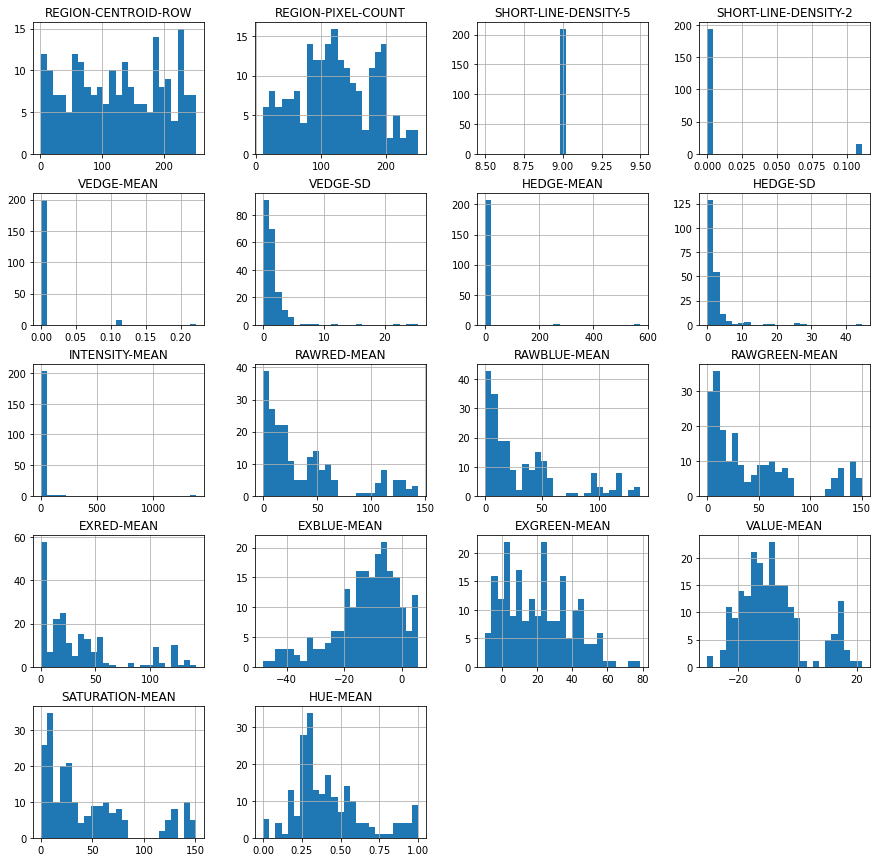

In [ ]:
import matplotlib.pyplot as plt
segmentation.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
print("SHORT-LINE-DENSITY-5 - unique values and counts:", 
      np.unique(segmentation_df['SHORT-LINE-DENSITY-5'], return_counts=True))

print("SHORT-LINE-DENSITY-2 - unique values and counts:", 
      np.unique(segmentation_df['SHORT-LINE-DENSITY-2'], return_counts=True))

# print("HEDGE-MEAN - unique values and counts:", 
#       np.unique(segmentation_df['HEDGE-MEAN'], return_counts=True))

print("VEDGE-MEAN - unique values and counts:", 
      np.unique(segmentation_df['VEDGE-MEAN'], return_counts=True))

# print("INTENSITY-MEAN - unique values and counts:", 
#       np.unique(segmentation_df['INTENSITY-MEAN'], return_counts=True))

SHORT-LINE-DENSITY-5 - unique values and counts: (array(['9'], dtype=object), array([210]))
SHORT-LINE-DENSITY-2 - unique values and counts: (array(['0.0', '0.11111111'], dtype=object), array([194,  16]))
VEDGE-MEAN - unique values and counts: (array(['0.0', '0.11111111', '0.22222222'], dtype=object), array([200,   8,   2]))


In [ ]:
del segmentation_df['SHORT-LINE-DENSITY-5']
del segmentation_df['SHORT-LINE-DENSITY-2']
del segmentation_df['VEDGE-MEAN']

segmentation = segmentation_df.iloc[:, 1:]
for col in segmentation.columns:
  segmentation[col] = pd.to_numeric(segmentation[col])
segmentation.head(2)

,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
3,140.0,125.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635
4,188.0,133.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580


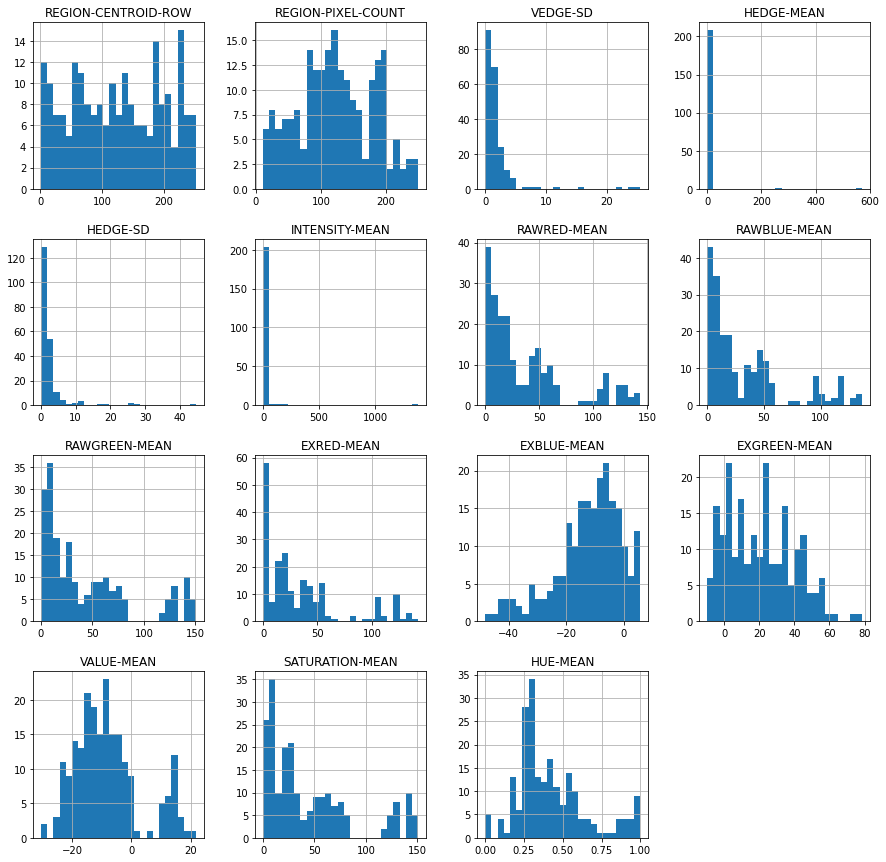

In [ ]:
segmentation.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
encoder = LabelEncoder()
segmentation_df['REGION-CENTROID-COL'] = encoder.fit_transform(segmentation_df['REGION-CENTROID-COL'])

segmentation_y = segmentation_df['REGION-CENTROID-COL']
np.unique(segmentation_y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([30, 30, 30, 30, 30, 30, 30]))

### Wine

In [ ]:
import pandas as pd

wine_df = pd.read_csv("wine.data", header=None, 
                 names=['Class','Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                        'Magnesium', 'Total phenols', 'Flavanoids', 
                        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
wine_df.head(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [ ]:
wine = wine_df.iloc[:, 1:]
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


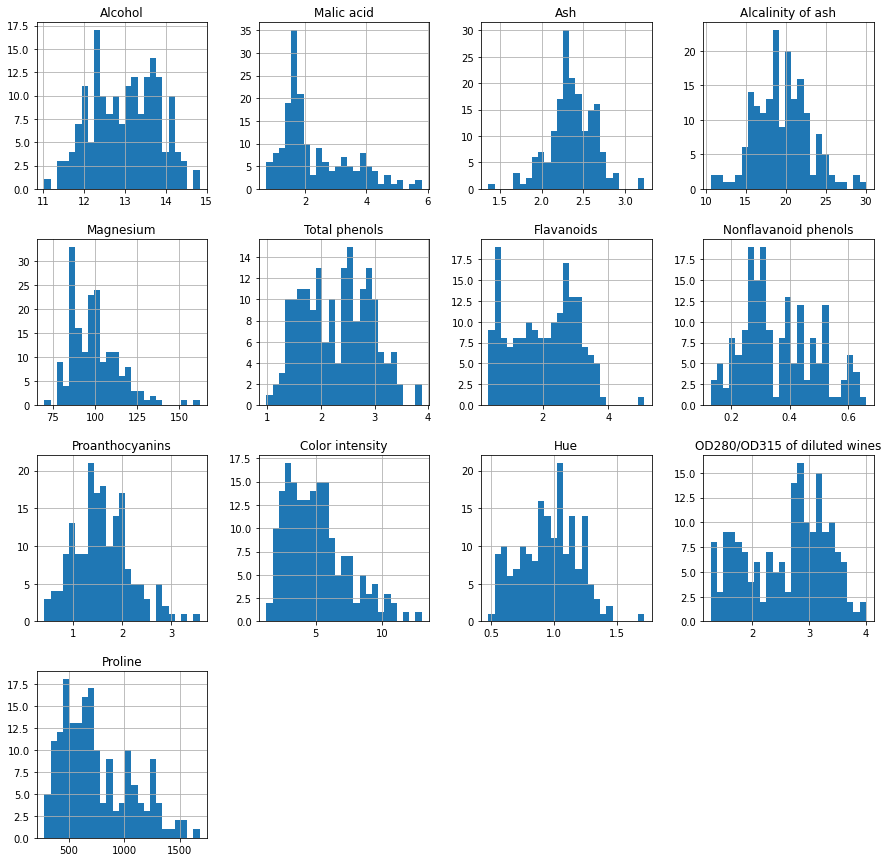

In [ ]:
import matplotlib.pyplot as plt
wine.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
wine_y = wine_df['Class']
np.unique(wine_y, return_counts=True)

(array([1, 2, 3]), array([59, 71, 48]))

### Zoo

In [ ]:
import pandas as pd

zoo_df = pd.read_csv("zoo.data", header=None, 
                 names=['animal name','hair','feathers','eggs','milk',
                        'airborne','aquatic','predator','toothed','backbone',
                        'breathes','venomous','fins','legs','tail','domestic',
                        'catsize','Class'])
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo = zoo_df.iloc[:, 1:zoo_df.shape[1] - 1]
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


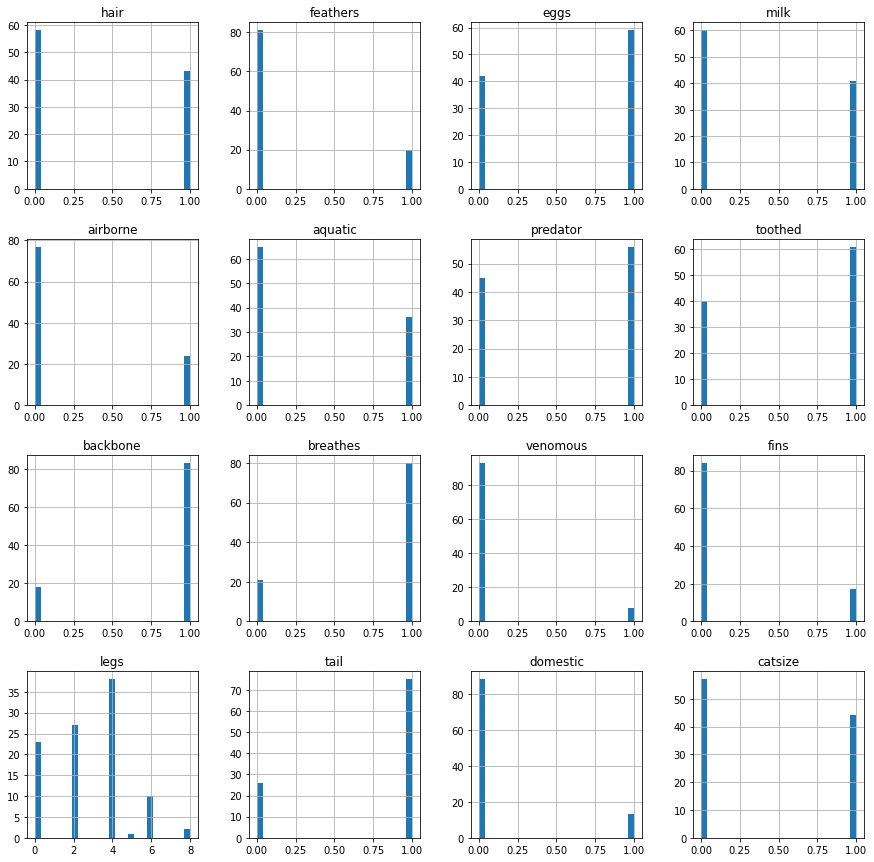

In [ ]:
import matplotlib.pyplot as plt
zoo.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
zoo_y = zoo_df['Class']
np.unique(zoo_y, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([41, 20,  5, 13,  4,  8, 10]))

## Синтетические данные

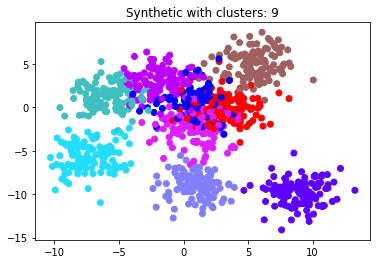

In [108]:
import numpy as np

import matplotlib.colors
import matplotlib.pyplot as plt

import sklearn.datasets as dt

random_state = 42
n_clusters = 7
n_features = 10
samples = 1000

color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

x, y = dt.make_blobs(n_features=n_features,
                             centers=9,
                             cluster_std=1.5,
                             random_state=99,
                             n_samples=samples)

my_scatter_plot = plt.scatter(x[:,0],
                                  x[:,1],
                                  c=y,
                                  vmin=min(y),
                                  vmax=max(y),
                                  cmap=color_map_discrete)
plt.title('Synthetic with clusters: '+str(9))
plt.show()

In [ ]:
import pandas as pd

X_synthetic = []
y_synthetic = []

for count in count_clusters:
  X_synthetic.append(pd.read_excel("synthetic_X_clusters_" + str(count) + ".xlsx"))
  y_synthetic.append(pd.read_excel("synthetic_y_clusters_" + str(count) + ".xlsx",index_col=0))

In [ ]:
!ls -la

total 155
-rw------- 1 root root 19488 Jun  6  1997 ecoli.data
-rw------- 1 root root 11903 Mar  2  1993 glass.data
-rw------- 1 root root  4551 Mar  9  1993 iris.data
-rw------- 1 root root 34842 Aug 15  1991 segmentation.data
-rw------- 1 root root 15291 May 11 06:09 synthetic_X_clusters_10.xlsx
-rw------- 1 root root  9964 May 15 10:06 synthetic_X_clusters_2.xlsx
-rw------- 1 root root  9936 May 15 10:06 synthetic_X_clusters_5.xlsx
-rw------- 1 root root  9952 May 15 10:06 synthetic_X_clusters_7.xlsx
-rw------- 1 root root  6045 May 11 06:09 synthetic_y_clusters_10.xlsx
-rw------- 1 root root  5956 May 15 10:06 synthetic_y_clusters_2.xlsx
-rw------- 1 root root  6001 May 15 10:06 synthetic_y_clusters_5.xlsx
-rw------- 1 root root  6017 May 15 10:06 synthetic_y_clusters_7.xlsx
-rw------- 1 root root 10782 Oct 30  1995 wine.data
-rw------- 1 root root  4126 Jul 23  1991 zoo.data


In [ ]:
import pandas as pd

X_synthetic = [pd.DataFrame(x[0]) for x in datasets]
y_synthetic = [pd.DataFrame(x[1]) for x in datasets]

In [ ]:
for x,y,count in zip(X_synthetic, y_synthetic, count_clusters):
  x.to_excel("synthetic_X_clusters_" + str(count) + ".xlsx")
  y.to_excel("synthetic_y_clusters_" + str(count) + ".xlsx")

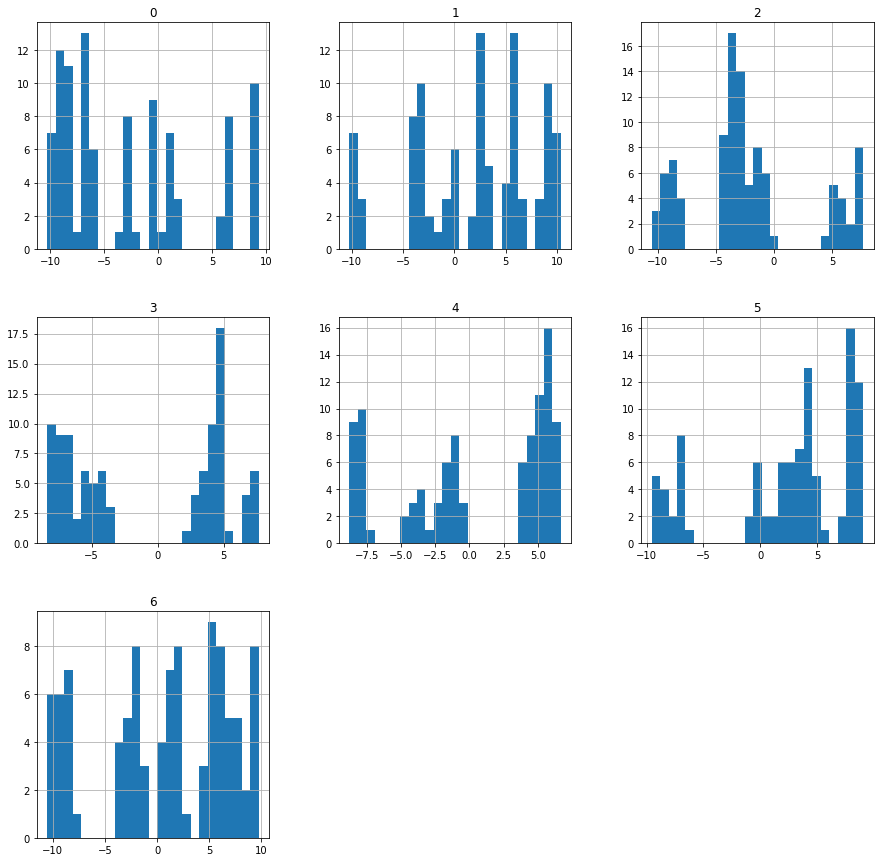

In [ ]:
import matplotlib.pyplot as plt
syntetic.hist(bins=25, figsize=(15,15))
plt.show()

# Методы определения правильного числа кластеров

Ниже представлены реализации рассматриваемых методов.

## K-Splits: Improved K-Means Clustering Algorithm to Automatically Detect the Number of Clusters 

In [80]:
import numpy as np
from sklearn.cluster import KMeans


def calc_l2_norm(c1, c2):
  d_base = np.linalg.norm(c1 - c2, 2)
  return d_base

def get_elements_from_cluster(X, clusters, num_cluster):
  output = []
  for element, num in zip(X, clusters):
    if num == num_cluster:
      output.append(element)
  return output

def calc_covar_matrix(X):
  """
  For data  in cluster C with centroid c, we can calculate the covariance matrix 
  """
  number_of_elements = len(X)
  centroid = np.mean(X, axis=0)
  sigma_x = X - centroid
  sum_of_cluster = 1./number_of_elements * np.matrix(sigma_x).T * np.matrix(sigma_x)
  u, v, vh = np.linalg.svd(sum_of_cluster)
  return u, v, vh


def proposed_k_means(X, Beta):
  count_clusters = 1
  clusters = list(np.zeros(len(X)))
  while count_clusters < k:
    Q_c = clusters.count(count_clusters - 1)

def calc_I_c(X, all_points, count_clusters):
  Q_c = len(X)
  Q = all_points
  k = count_clusters
  thr = Q * 1.0 / k

  u, v, _ = calc_covar_matrix(X)
  
  I_c = np.tanh(Q_c * 1.0 / thr) * v[0]
  return I_c


def calc_J_k(J_c, k):
  J_k = np.sum(J_c) / k
  return J_k

def calc_J_c(clust):
  Q_c = len(clust)
  u, v, l = calc_covar_matrix(clust)
  print("u=",u)
  print("v=",v)
  print("l=",l)
  if v[0] == 0:
    v[0] = 1
  J_c = Q_c / v[0]
  return J_c

def k_splits(X, Beta):
  k = 1
  clusters = list(np.zeros(len(X)))
  first_iteration = True
  I_c = []
  J_c = []
  J_k = []
  d = 0
  res_clusters = []
  centroids = []
  while first_iteration or True:#(d * 1.0 / d_base <= Beta):
    I_c = []
    J_c = []
    for clust in np.unique(clusters):
      cur_clust = []
      for index, point in enumerate(X.iterrows()):
        if clusters[index] == clust:
          cur_clust.append(point[1])
      I_c.append(calc_I_c(cur_clust, len(X), len(np.unique(clusters))))
      J_c.append(calc_J_c(cur_clust))
    J_k.append(calc_J_k(J_c, k))
    C_w = np.argmax(I_c) # number of the worth cluster
    # split
    worth = []
    print("len I_c=", len(I_c))
    print("C_w=",C_w)
    print(I_c)
    for index, point in enumerate(X.iterrows()):
      if clusters[index] == C_w:
        worth.append(point[1])
        
    print("========")
    print("worth:",worth)
    u,v, vh = calc_covar_matrix(worth)
    mean_value = KMeans(n_clusters=1).fit(worth).cluster_centers_
    sigma_worth = worth - mean_value
    first = []
    second = []

    res_clusters.append(clusters)
    for index, point in enumerate(sigma_worth):
      if clusters[index] == C_w:

        if (np.matrix(point) * np.matrix(u[0]).T)[0][0] >= 0:
          first.append(point)
          continue
        else:
          clusters[index] = k
          second.append(point)
    
    first = pd.DataFrame(np.array(first))
    second = pd.DataFrame(np.array(second))

    if len(first) == 0 or len(second) == 0:
      break
    c_kw1, c_kw2 = KMeans(n_clusters=1).fit(first).cluster_centers_[0], KMeans(n_clusters=1).fit(second).cluster_centers_[0]
    centroids.append(c_kw1)
    centroids.append(c_kw2)

    if first_iteration:
      first_iteration = False
      d_base = calc_l2_norm(c_kw1, c_kw2)
      # d = d_base
    else:
      
      d_all = []
      for i in range(len(centroids)):
        for j in range(i + 1, len(centroids)):
          dist = calc_l2_norm(centroids[i], centroids[j])
          
          d_all.append(dist)
      d = np.min(d_all)

    if d * 1.0 / d_base <= Beta:
      k += 1
      # continue
    else:
      # iter = np.argmax(J_k)
      # return iter
      break
  max_ind = np.argmax(J_k)
  res_k = np.unique(res_clusters[max_ind])
  return len(res_k), res_clusters[max_ind]


In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
  k_ecoli_density, distrib_ecoli_density = k_splits(ecoli,0.5)
  k_glass_density, distrib_glass_density = k_splits(glass,0.5)
  k_iris_density, distrib_iris_density = k_splits(iris,0.5)
  k_segmentation_density, distrib_segmentation_density = k_splits(segmentation,0.5)
  k_wine_density, distrib_wine_density = k_splits(wine,0.5)
  k_zoo_density, distrib_zoo_density = k_splits(zoo,0.5)

In [92]:
from time import time
start = time()
with contextlib.redirect_stdout(None):
  k_synthetic, distrib_synthetic = k_splits(pd.DataFrame(x), 0.5)
print("total time:", time() - start)
print("synthetic", "count clusters:", k_synthetic, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic, y))

In [32]:
import contextlib
import pandas as pd

with contextlib.redirect_stdout(None):
  k_2_density, distrib_2_density = k_splits(pd.DataFrame(x),0.5)
  k_5_density, distrib_5_density = k_splits(X_synthetic[1],0.5)
  k_7_density, distrib_7_density = k_splits(X_synthetic[2],0.5)
  k_segmentation_density, distrib_segmentation_density = k_splits(segmentation,0.5)
  k_wine_density, distrib_wine_density = k_splits(wine,0.5)
  k_zoo_density, distrib_zoo_density = k_splits(zoo,0.5)

In [1]:
import contextlib
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score

with contextlib.redirect_stdout(None):
  k_synthetic_2, distrib_synthetic_2 = k_splits(pd.DataFrame(datasets[0][0]),0.5)
  k_synthetic_5, distrib_synthetic_5 = k_splits(pd.DataFrame(datasets[1][0]),0.5)
  k_synthetic_7, distrib_synthetic_7 = k_splits(pd.DataFrame(datasets[2][0]),0.5)

print("synthetic", "count clusters:", k_2_density, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_2_density, y))
print("synthetic", "count clusters:", k_synthetic_5, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_5, datasets[1][1]))
print("synthetic", "count clusters:", k_synthetic_7, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_7, datasets[2][1]))

In [37]:
!python --version

Python 3.7.13


In [41]:
!free -g

              total        used        free      shared  buff/cache   available
Mem:             12           1           9           0           1          11
Swap:             0           0           0


In [40]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

In [2]:

from sklearn.metrics.cluster import adjusted_rand_score

for name, k, distrib, right in zip(
    ["ecoli", "glass", "iris", "segmentation", "wine", "zoo"],
    [k_ecoli_density, k_glass_density, k_iris_density, 
     k_segmentation_density,k_wine_density,k_zoo_density], 
    [distrib_ecoli_density, distrib_glass_density, 
     distrib_iris_density,distrib_segmentation_density,distrib_wine_density,
     distrib_zoo_density],
     [ecoli_y, glass_y, iris_y, segmentation_y, wine_y, zoo_y]):
  print(name, "count clusters:", k, 
        "adjusted_rand_score:", adjusted_rand_score(distrib, right))

## P. Olukanmi, F. Nelwamondo, T. Marwala, B. Twala, “Automatic detection of outliers and the number of clusters in k-means clustering via Chebyshev-type inequalities”, 2022

In [51]:

from sklearn.cluster import KMeans
import numpy as np

def calc_dist(c1, c2):
  d_base = np.linalg.norm(c1 - c2)
  return d_base

def alg(X):
  N = X.shape[0]
  k = 1 # number of clusters
  test = False
  while test == False and k < N:
    for ran in range(1):
      kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter = 400, n_init = 20, random_state = ran).fit(X)
      c = kmeans.labels_
      unique, counts = np.unique(c, return_counts=True)
      
      centroids = kmeans.cluster_centers_
      D = []
      for index, point in enumerate(X.iterrows()):
        D.append(calc_dist(centroids[c[index]], point[1]))
      sigma_d = np.std(D,axis=0)
      c_d1 = 0
      c_d2 = 0
      s_d = np.array(sorted(D))
      
      c_d1 = len(s_d[s_d <= 2 * sigma_d])
      c_d2 = len(s_d[s_d <= sigma_d])
      
      if c_d1 > 8/9 * N:
        test = True
        break
      elif c_d2 > 5/9 * N:
        test = True
        break
    k += 1
  return k, kmeans.labels_


In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
  k_ecoli_density, distrib_ecoli_density = alg(ecoli)
  k_glass_density, distrib_glass_density = alg(glass)
  k_iris_density, distrib_iris_density = alg(iris)
  k_segmentation_density, distrib_segmentation_density = alg(segmentation)
  k_wine_density, distrib_wine_density = alg(wine)
  k_zoo_density, distrib_zoo_density = alg(zoo)

In [ ]:
import contextlib
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score

with contextlib.redirect_stdout(None):
  k_synthetic_2, distrib_synthetic_2 = alg(pd.DataFrame(datasets[0][0]))
  k_synthetic_5, distrib_synthetic_5 = alg(pd.DataFrame(datasets[1][0]))
  k_synthetic_7, distrib_synthetic_7 = alg(pd.DataFrame(datasets[2][0]))

print("synthetic", "count clusters:", k_synthetic_2, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_2, datasets[0][1]))
print("synthetic", "count clusters:", k_synthetic_5, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_5, datasets[1][1]))
print("synthetic", "count clusters:", k_synthetic_7, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_7, datasets[2][1]))

synthetic count clusters: 3 adjusted_rand_score: 1.0
synthetic count clusters: 7 adjusted_rand_score: 0.7806272132980816
synthetic count clusters: 6 adjusted_rand_score: 0.7196590210036031


In [104]:
from time import time
start = time()
with contextlib.redirect_stdout(None):
  k_synthetic, distrib_synthetic = alg(pd.DataFrame(x),10)
print("total time:", time() - start)

total time: 8.324571132659912


In [105]:
np.unique(distrib_synthetic)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [106]:
print("synthetic", "count clusters:", k_synthetic - 1, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic, y))

synthetic count clusters: 10 adjusted_rand_score: 0.8663736320716245


In [ ]:
distrib_ecoli_density = distrib_ecoli_density.labels_
distrib_glass_density = distrib_glass_density.labels_
distrib_iris_density = distrib_iris_density.labels_
distrib_segmentation_density = distrib_segmentation_density.labels_
distrib_wine_density = distrib_wine_density.labels_
distrib_zoo_density = distrib_zoo_density.labels_

In [3]:
k_zoo_density, distrib_zoo_density = alg(zoo)

In [4]:
from sklearn.metrics.cluster import adjusted_rand_score

for name, k, distrib, right in zip(
    ["ecoli", "glass", "iris", "segmentation", "wine", "zoo"],
    [k_ecoli_density, k_glass_density, k_iris_density, 
     k_segmentation_density,k_wine_density,k_zoo_density], 
    [distrib_ecoli_density, distrib_glass_density, 
     distrib_iris_density,distrib_segmentation_density,distrib_wine_density,
     distrib_zoo_density],
     [ecoli_y, glass_y, iris_y, segmentation_y, wine_y, zoo_y]):
  print(name, "count clusters:", k, 
        "adjusted_rand_score:", adjusted_rand_score(distrib, right))

## W. Tong, S. Liu, and X. Gao, “A density-peak-based clustering algorithm of automatically determining the number of clusters”, 2020

In [69]:
import numpy as np
import operator
from queue import Queue

def calc_l2_norm(c1, c2):
  d_base = np.linalg.norm(c1 - c2, 2)
  return d_base

def check_integration(x,y):
  for ele in y:
    if (x == ele).all():
      return True
  return False


def DPADN(X,cr=10):
  D = []
  for i in range(X.shape[0]):
    row = []
    for j in range(X.shape[0]):
      dist = calc_l2_norm(X.iloc[i,:], X.iloc[j,:])
      row.append(dist)
    D.append(row)
  dc = np.sum(D) / X.shape[0] * 2
  

  ro = []
  for row in D:
    ro.append(np.sum(row) - dc)

  sigmas = []
  for i in range(len(D)):
    check = True
    for j in range(len(D)):
      if ro[j] > ro[i]:
        check = False
        break
    data_withoit_i = np.delete(np.array(D[i]), i)
    if check:
      
      sigmas.append(np.max(data_withoit_i))
    else:
      
      sigmas.append(np.min(data_withoit_i))
    
  ro_mean = np.mean(ro)
  sigma_mean = np.mean(sigmas)

  delta_ro = []
  for i in range(len(D)):
    ro_i = 0
    for j in range(len(D)):
      if i == j:
        continue
      ro_i += np.exp(- (D[i][j] / dc)**2 )
    delta_ro.append(ro_i)
  delta_ro_m_index = np.argmax(delta_ro)
  delta_ro_m = delta_ro[delta_ro_m_index]
  Pm = X.iloc[delta_ro_m_index,:]
  ro_pm = ro[delta_ro_m_index]
  delta_ro_mean = np.mean(delta_ro)


  C = [-1] * X.shape[0]
  centroids = []
  centroids_index = []
  j = -1
  
  
  for i in range(0, X.shape[0]):
    if ro_pm < ro_mean and delta_ro_m > 2 * delta_ro_mean:
      if ro[i] > ro_mean and sigmas[i] > sigma_mean:
        centroids.append(X.iloc[i,:])
        centroids_index.append(i)
        j += 1
        C[i] = j
    else:
      if sigmas[i] > sigma_mean:
        centroids.append(X.iloc[i,:])
        centroids_index.append(i)
        j += 1
        C[i] = j
    



  for i in range(0, X.shape[0]):
    if C[i] == -1:
      # find nearest centroid
      min_ind = -1
      min_dist = np.inf
      for index, cent in enumerate(centroids):
        dis = calc_l2_norm(cent, X.iloc[i,:])
        if dis < min_dist:
          min_ind = index
          min_dist = dis
      C[i] = min_ind
  # print("C:", C)
  # print("centroids:", centroids)
  # merging process
  clusters_dist = dict()
  for i in range(len(centroids)):
    # cu = []
    for j in range(i + 1, len(centroids)):
      clusters_dist[str(i) + "-" + str(j)] = calc_l2_norm(centroids[i], centroids[j])

  sorted_clusters_dist_tuples = sorted(clusters_dist.items(),key=operator.itemgetter(1))
  sorted_clusters_dist = {k: v for k, v in sorted_clusters_dist_tuples}
  
  number_of_clusters = len(centroids)
  the_same_clusters = dict()
  q = Queue()
  for x in sorted_clusters_dist_tuples:
    q.put(x)
  
  new_C = np.array(C)
  all_clusters = []
  
  result = dict()
  checked = []
  while number_of_clusters > 1:
    cur_element = q.get()
    k, v = cur_element
    print("cur_element=",cur_element)
    f_cl, s_cl = [int(x) for x in k.split('-')]
    checked.append(k)
    print("first:",f_cl, "second:",s_cl)
    if f_cl in the_same_clusters:
      if s_cl in the_same_clusters:
        c1 = the_same_clusters[f_cl]
        c2 = the_same_clusters[s_cl]
        if c1 != c2:
           the_same_clusters[s_cl] = c1
           new_C = np.where(new_C == c2, c1, new_C)

        number_of_clusters = len(np.unique(new_C))
        all_clusters.append(number_of_clusters)
      else:
        c1 = the_same_clusters[f_cl]
        the_same_clusters[s_cl] = c1
        new_C = np.where(new_C == s_cl, c1, new_C)
        # q = upd_centr(X, c1, s_cl, new_C,centroids, checked)
        number_of_clusters = len(np.unique(new_C))
        all_clusters.append(number_of_clusters)
    else:
      if s_cl in the_same_clusters:
        c2 = the_same_clusters[s_cl]
        the_same_clusters[f_cl] = c2
        new_C = np.where(new_C == f_cl, c2, new_C)
        # q = upd_centr(X, c2, f_cl, new_C,centroids, checked)
        number_of_clusters = len(np.unique(new_C))
        all_clusters.append(number_of_clusters)
      else:
        the_same_clusters[s_cl] = s_cl
        the_same_clusters[f_cl] = s_cl
        new_C = np.where(new_C == f_cl, s_cl, new_C)
        # q = upd_centr(X, s_cl, f_cl, new_C,centroids, checked)
        number_of_clusters = len(np.unique(new_C))
        all_clusters.append(number_of_clusters)
    print(np.unique(all_clusters, return_counts=True))
    if number_of_clusters not in result:
      result[number_of_clusters] = new_C
  uniques, counts = np.unique(all_clusters, return_counts=True)
  ind_max = np.argmax(counts)
  ans = result[uniques[ind_max]]
  print("result:",result[uniques[ind_max]])
  return uniques[ind_max], ans

In [107]:
from time import time
start = time()
with contextlib.redirect_stdout(None):
  k_synthetic, distrib_synthetic = DPADN(pd.DataFrame(x))
print("total time:", time() - start)
print("synthetic", "count clusters:", k_synthetic, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic, y))

total time: 480.46359300613403
synthetic count clusters: 7 adjusted_rand_score: 1.0


In [73]:
y

array([7, 1, 2, 4, 1, 8, 1, 2, 7, 7, 0, 0, 8, 4, 7, 1, 8, 5, 8, 0, 5, 6,
       1, 2, 1, 0, 4, 3, 6, 4, 0, 2, 2, 4, 5, 1, 1, 3, 6, 8, 8, 4, 5, 8,
       0, 7, 3, 1, 0, 2, 4, 7, 7, 2, 0, 4, 6, 5, 8, 2, 1, 6, 8, 1, 8, 3,
       0, 4, 1, 4, 1, 0, 3, 2, 3, 7, 6, 2, 8, 0, 4, 5, 5, 5, 6, 8, 8, 8,
       6, 5, 4, 3, 3, 2, 1, 0, 7, 1, 7, 6, 1, 2, 2, 6, 8, 0, 6, 5, 4, 5,
       5, 5, 0, 4, 0, 7, 7, 1, 6, 8, 0, 8, 5, 2, 6, 4, 6, 5, 6, 1, 6, 2,
       2, 2, 5, 0, 3, 1, 5, 2, 8, 6, 2, 2, 8, 1, 4, 7, 1, 1, 0, 7, 4, 7,
       8, 6, 3, 4, 1, 5, 2, 5, 3, 6, 1, 7, 2, 3, 6, 3, 1, 1, 3, 0, 2, 2,
       3, 0, 1, 5, 2, 6, 2, 6, 5, 0, 7, 8, 8, 3, 0, 8, 6, 2, 6, 3, 2, 3,
       7, 4, 7, 7, 7, 7, 4, 3, 1, 3, 6, 6, 7, 8, 1, 7, 7, 7, 5, 4, 3, 7,
       8, 0, 6, 7, 7, 0, 3, 0, 5, 8, 2, 6, 2, 2, 0, 7, 6, 3, 5, 4, 8, 6,
       6, 6, 0, 4, 0, 4, 2, 8, 4, 8, 5, 0, 8, 7, 8, 5, 4, 5, 6, 6, 7, 1,
       2, 5, 4, 5, 8, 1, 7, 0, 8, 1, 2, 6, 7, 1, 7, 4, 7, 1, 3, 1, 5, 0,
       0, 4, 1, 6, 3, 5, 8, 3, 6, 8, 7, 8, 6, 5, 0,

In [71]:
print("synthetic", "count clusters:", k_synthetic, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic, y))

synthetic count clusters: 9 adjusted_rand_score: 1.0


In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
  k_ecoli_density, distrib_ecoli_density = DPADN(ecoli)

In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
  k_glass_density, distrib_glass_density = DPADN(glass)

In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
    k_iris_density, distrib_iris_density = DPADN(iris)

In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
    k_segmentation_density, distrib_segmentation_density = DPADN(segmentation)
    k_wine_density, distrib_wine_density = DPADN(wine)
    k_zoo_density, distrib_zoo_density = DPADN(zoo)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

# print(new_iris_df['Class'].value_counts())
# ir_names = {"Class":{"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}
# new_df = new_iris_df.replace(ir_names)
# # print(new_df['Class'].value_counts())
# iris_right_cl = np.array(new_df['Class'].to_numpy())
# print(len(right_cl))
# res1 = kmeans.labels
# res1 = distrib_iris_density
# adjusted_rand_score(res1, right_cl)
for name, k, distrib, right in zip(
    ["ecoli", "glass", "iris", "segmentation", "wine", "zoo"],
    [k_ecoli_density, k_glass_density, k_iris_density, 
     k_segmentation_density,k_wine_density,k_zoo_density], 
    [distrib_ecoli_density, distrib_glass_density, 
     distrib_iris_density,distrib_segmentation_density,distrib_wine_density,
     distrib_zoo_density],
     [ecoli_y, glass_y, iris_y, segmentation_y, wine_y, zoo_y]):
  print(name, "count clusters:", k, 
        "adjusted_rand_score:", adjusted_rand_score(distrib, right))

NameError: ignored

In [ ]:
# import contextlib
# import pandas as pd
# from sklearn.metrics.cluster import adjusted_rand_score
# # TO DO
# with contextlib.redirect_stdout(None):
#   k_synthetic_2, distrib_synthetic_2 = DPADN(pd.DataFrame(datasets[0][0]))
#   k_synthetic_5, distrib_synthetic_5 = DPADN(pd.DataFrame(datasets[1][0]))
#   k_synthetic_7, distrib_synthetic_7 = DPADN(pd.DataFrame(datasets[2][0]))

# print("synthetic", "count clusters:", k_synthetic_2, 
#       "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_2, datasets[0][1]))
# print("synthetic", "count clusters:", k_synthetic_5, 
#       "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_5, datasets[1][1]))
# print("synthetic", "count clusters:", k_synthetic_7, 
#       "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_7, datasets[2][1]))

## R. Vangara, K. Rasmussen, G. Chennupati and B. Alexandrov, “Determination of the number of clusters by symmetric non-negative matrix factorization”, 2021

Установка библиотеки для алгоритма SymmNMF.

In [76]:
import numpy as np
import networkx as nx
import karateclub.community_detection.overlapping as karate

def calc_dist(c1, c2):
  d_base = np.linalg.norm(c1 - c2, 2)
  return d_base

def buildSimilarityMatrix(X, sigma):
  distance_matrix = []
  # i = 0
  for i in range(len(X)):
    now_row = []
    for j in range(len(X)):
      f1 = X.iloc[i]
      f2 = X.iloc[j]
      dist = calc_dist(f1, f2)
      now_row.append(dist)
    # for j in range(len(row)):
      # now_row.append(calc_dist(row[i], row[j]))
    distance_matrix.append(now_row)
    # i += 1
  local_scaling = []
  for i in range(len(distance_matrix)):
    min_value = np.sort(distance_matrix[0])[1]
    local_scaling.append(min_value)
  
  S = [] # weighted adjacency matrix
  for i in range(len(X)):
    now = []
    for j in range(len(X)):
      lit_s = np.exp(-distance_matrix[i][j] / (local_scaling[i] * local_scaling[j]) )
      now.append(lit_s)
    S.append(now)
  # print(np.matrix(S).shape)
  # print("S:", S)
  S = np.matrix(S)
  D = [] # degree matrix
  for i in range(len(X)):
    # for j in range(len(X)):
    D.append(np.sum(distance_matrix[i]))
      # print(type(np.sum(distance_matrix[i])))
  D = np.array(D)

  A = np.diag(D** (-1/2)) * np.matrix(S) * np.diag(D ** (-1/2))


  graph = nx.from_numpy_matrix(A)

  return graph

def getConnectivityMatrix(ID):
  connectivity_matrix = []
  for i in range(len(ID)):
    row = []
    for j in range(len(ID)):

      if ID[i] == ID[j]:
        row.append(1)
      else:
        row.append(0)
    arr = np.array(row)
    # print("ID i=", ID[i], "i=", i,"count:", len(arr[arr>0]), "len:",len(arr))
    connectivity_matrix.append(row)
  return np.matrix(connectivity_matrix)

def getConsensusMatrix(data, r):
  print("before:",data)
  # data = np.matrix(data)
  # M = np.sum(data, axis=0) / r
  M = np.mean(data, axis=0)
  print("M=:",M, "r=",r)
  print("after:", M.shape)
  return M

def buildCDFs(Mk, m, c=0.5):
  cdf = []
  print(Mk)
  print(type(Mk))
  print(Mk[0])
  print(type(Mk[0]))
  print("unique:", np.unique(Mk))
  for mat in Mk:
    cur_cdf = 0
    for i in range(len(mat)):
      for j in range(i + 1, len(Mk)):
        if mat[i][j] <= c:
          cur_cdf += 1
    # for x in row:
      # x = np.array(x)
      # cur_cdf = len(x[x < c]) / (m * (m + 1) / 2)
    cur_cdf /= (m * (m - 1) / 2)
    print("cur_cdf=",cur_cdf, "c:", c)
      # 
      # if x <= c:
        # cur_cdf = np.sum(x) / (m * (m + 1) / 2)
    cdf.append(cur_cdf)
  return np.array(cdf)

def SymmNMFk(X, k_l, k_u, r,cr=10):
  data_mk = []
  data_wq = []
  all_id = []
  for k in range(k_l, k_u + 1):
    data_id = []
    cur_wq = []
    i_d = []
    for q in range(1, r + 1):
      sigma = np.random.sample() # случайное число
      # sigma = np.random.sample(X.shape)
      # sigma = np.random.randint(-100, 100, X.shape)
      X_q = X + sigma # Perturb
      A_q = buildSimilarityMatrix(X_q, sigma)

      # W_q = SymmNMF(A_q, k)
      sym = karate.SymmNMF(k,seed=2*q + k * 2 + q + k)
      sym.fit(A_q)
      W_q = sym.get_embedding()
      cur_wq.append(W_q)
      ID_q = sym.get_memberships()
      
      i_d.append(ID_q)
      B_q = getConnectivityMatrix(ID_q)

      data_id.append(B_q)

    mk = getConsensusMatrix(data_id, r)
    print("Mk shape:", mk.shape)
    data_mk.append(mk)
    all_id.append(i_d)
    if k == cr:
      break
  print("ConsensusMatrix:", data_mk)
  CDFs_c1 = buildCDFs(data_mk, X.shape[0], 0.3)
  CDFs_c2 = buildCDFs(data_mk, X.shape[0], 0.7)

  PAC = CDFs_c2 - CDFs_c1
  print("PAC:", PAC)
  k_opt = np.argmin(PAC)
  res = all_id[k_opt][0]
  print(all_id[k_opt])

  return k_opt + k_l, np.array([x for x in res.values()])

In [5]:
from time import time
start = time()
with contextlib.redirect_stdout(None):
  k_synthetic, distrib_synthetic = SymmNMFk(pd.DataFrame(x), 8,10,5)
print("total time:", time() - start)
print("synthetic", "count clusters:", k_synthetic, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic, y))

In [90]:
import contextlib
with contextlib.redirect_stdout(None):
    k_ecoli, dist_ecoli = SymmNMFk(ecoli, 7,9, 5)

In [91]:
import contextlib
with contextlib.redirect_stdout(None):
    k_iris, dist_iris = SymmNMFk(iris, 2,3, 5)

In [6]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ecoli", "count clusters:", k_ecoli, 
        "adjusted_rand_score:", adjusted_rand_score(dist_ecoli, ecoli_y))

print("iris", "count clusters:",k_iris, 
      "adjusted_rand_score:", adjusted_rand_score(dist_iris, iris_y))

In [ ]:
import contextlib
with contextlib.redirect_stdout(None):
    k_segmentation, dist_segmentation = SymmNMFk(segmentation, 2,3, 5)
    k_wine, dist_wine = SymmNMFk(wine, 2,3, 5)
    k_zoo, dist_zoo = SymmNMFk(zoo, 2,3, 5)

In [7]:
for i in range(len(distrib_synthetic_2)):

  test = np.array([x for x in distrib_synthetic_2[i].values()])

  print("synthetic", "count clusters:", k_synthetic_2, 
        "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_2, datasets[0][1]))

In [8]:
import contextlib
import pandas as pd
from sklearn.metrics.cluster import adjusted_rand_score

with contextlib.redirect_stdout(None):
  k_synthetic_2, distrib_synthetic_2 = SymmNMFk(pd.DataFrame(datasets[0][0]), 2, 3, 5,3)
  k_synthetic_5, distrib_synthetic_5 = SymmNMFk(pd.DataFrame(datasets[1][0]),4,6,5,6)
  k_synthetic_7, distrib_synthetic_7 = SymmNMFk(pd.DataFrame(datasets[2][0]),5,8,5,8)

print("synthetic", "count clusters:", k_synthetic_2, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_2, datasets[0][1]))
print("synthetic", "count clusters:", k_synthetic_5, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_5, datasets[1][1]))
print("synthetic", "count clusters:", k_synthetic_7, 
      "adjusted_rand_score:", adjusted_rand_score(distrib_synthetic_7, datasets[2][1]))

In [ ]:
# from sklearn.metrics.cluster import adjusted_rand_score

# for name, k, distrib, right in zip(
#     ["ecoli", "glass", "iris", "segmentation", "wine", "zoo"],
#     [k_ecoli_density, k_glass_density, k_iris_density, 
#      k_segmentation_density,k_wine_density,k_zoo_density], 
#     [distrib_ecoli_density, distrib_glass_density, 
#      distrib_iris_density,distrib_segmentation_density,distrib_wine_density,
#      distrib_zoo_density],
#      [ecoli_y, glass_y, iris_y, segmentation_y, wine_y, zoo_y]):
#   print(name, "count clusters:", k, 
#         "adjusted_rand_score:", adjusted_rand_score(distrib, right))